## MNIST Neural Network
#### Creating and Comparing nn models
##

##### Imports, Log and Model files, Handlers

In [16]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = os.path.abspath('..')
subdirts = ['logs', 'trained_models', 'source']

for subdir in subdirts:
    full_path = os.path.join(root_dir, subdir)
    if os.path.isdir(full_path) and full_path not in sys.path:
        sys.path.append(full_path)

from network import Network
from logHandler import LogHandler

log_files = sorted(f for f in os.listdir(os.path.join(root_dir, 'logs')) if f.endswith('.log'))
model_files = sorted(f for f in os.listdir(os.path.join(root_dir, 'trained_models')) if f.endswith('.pkl'))

log_handler = LogHandler()

print("Log files:", log_files)
print("Model files:", model_files)

Log files: ['model_784_10_softmax.log', 'model_784_128_64_10_relu_relu_softmax.log', 'model_784_256_128_64_10_relu_relu_relu_softmax.log', 'model_784_64_10_relu_softmax.log', 'model_784_784_16_16_10_relu_relu_relu_softmax.log']
Model files: ['model_784_10_softmax.pkl', 'model_784_128_64_10_relu_relu_softmax.pkl', 'model_784_256_128_64_10_relu_relu_relu_softmax.pkl', 'model_784_64_10_relu_softmax.pkl', 'model_784_784_16_16_10_relu_relu_relu_softmax.pkl']


##### Building data frame from log file

In [17]:
dataFrames = {}
epochDataFrames = {}
models = {}
model_names = set()
for log_file in log_files:
    model_name = log_handler.extract_activations(log_file)
    model_path = log_file.replace('.log', '.pkl')
    model_path = os.path.join(root_dir, 'trained_models', model_path)

    log_path = os.path.join(root_dir, 'logs', log_file)

    models[model_name] = Network.load(model_path)
    dataFrames[model_name], epochDataFrames[model_name] = log_handler.parse(log_path)
    model_names.add(model_name)
    print(f"Processing log file: {log_file} with model: {model_name}")

{'timestamp': '2025-06-06 18:23:15,249', 'epoch': '1', 'total_epochs': '10', 'processed': '1000', 'total_images': '60000', 'avg_loss': '2.3294', 'accuracy': '15.0000', 'images_left': '59000', 'batch_time': '0.07'}
{'timestamp': '2025-06-06 18:23:15,314', 'epoch': '1', 'total_epochs': '10', 'processed': '2000', 'total_images': '60000', 'avg_loss': '2.2719', 'accuracy': '18.8500', 'images_left': '58000', 'batch_time': '0.06'}
{'timestamp': '2025-06-06 18:23:15,379', 'epoch': '1', 'total_epochs': '10', 'processed': '3000', 'total_images': '60000', 'avg_loss': '2.2159', 'accuracy': '24.8000', 'images_left': '57000', 'batch_time': '0.06'}
{'timestamp': '2025-06-06 18:23:15,442', 'epoch': '1', 'total_epochs': '10', 'processed': '4000', 'total_images': '60000', 'avg_loss': '2.1654', 'accuracy': '30.2000', 'images_left': '56000', 'batch_time': '0.06'}
{'timestamp': '2025-06-06 18:23:15,507', 'epoch': '1', 'total_epochs': '10', 'processed': '5000', 'total_images': '60000', 'avg_loss': '2.1146',

##### Building dataframes for analysis

In [18]:
# Containers for all graphs
accuracy_lines = {}
loss_lines = {}
acc_vs_loss_lines = {}
batch_time_lines = {}
final_stats = {}

#single loop to extract all needed data
for model_name, df in dataFrames.items():
    first_epoch = df[df['epoch'] == 1]

    #line plots
    accuracy_lines[model_name] = (first_epoch['processed'].values, first_epoch['accuracy'].values)
    loss_lines[model_name] = (first_epoch['processed'].values, first_epoch['avg_loss'].values)
    acc_vs_loss_lines[model_name] = (first_epoch['avg_loss'].values, first_epoch['accuracy'].values)
    batch_time_lines[model_name] = (first_epoch['processed'].values, first_epoch['batch_time'].values)

    #Final stats
    #May need refactoring if more stats are added or if epoch summary line is parsed
    final_row = first_epoch.iloc[-1]   
    final_stats[model_name] = {
        'accuracy': final_row['accuracy'],
        'avg_loss': final_row['avg_loss'],
        'batch_time': final_row['batch_time'],
    }

#convert summary to DataFrame
summary_df = pd.DataFrame(final_stats).T
summary_df['efficiency'] = summary_df['accuracy'] / summary_df['batch_time']

def plot_model_comparison(xy_dict, x_label, y_label, title):
    plt.figure(figsize=(8, 5))
    for name, (x, y) in xy_dict.items():
        plt.plot(x, y, label=name)
    plt.title(title)
    plt.xlabel(x_label); plt.ylabel(y_label)
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

##### Visulaizing key insights from first Epoch

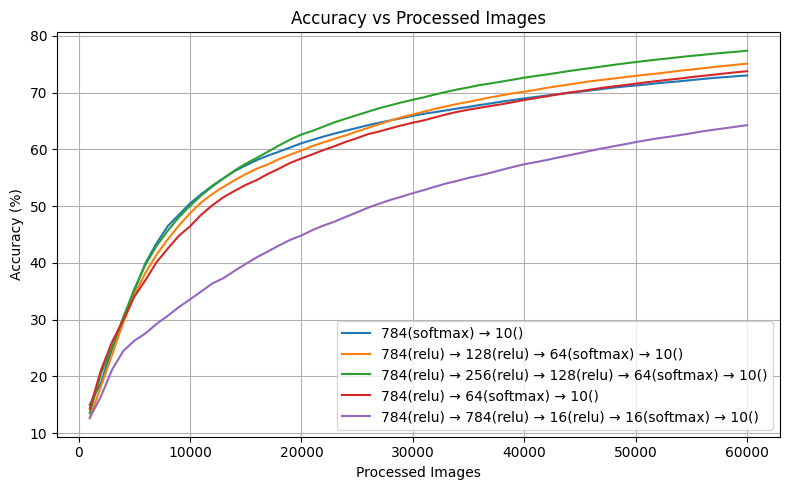

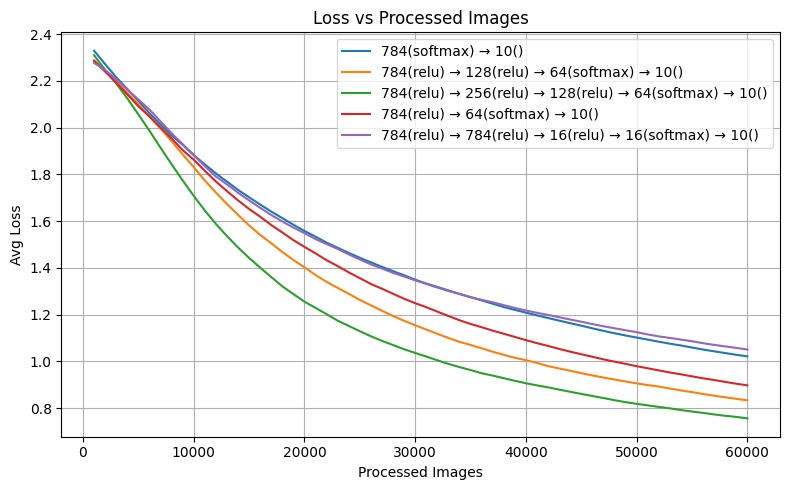

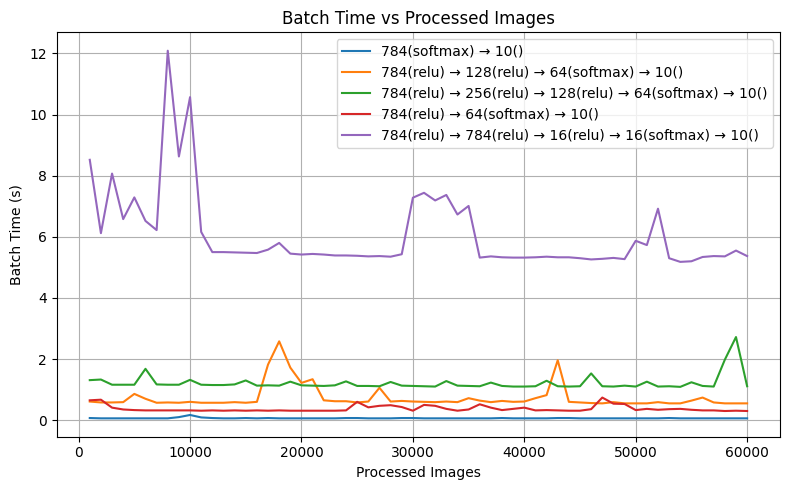

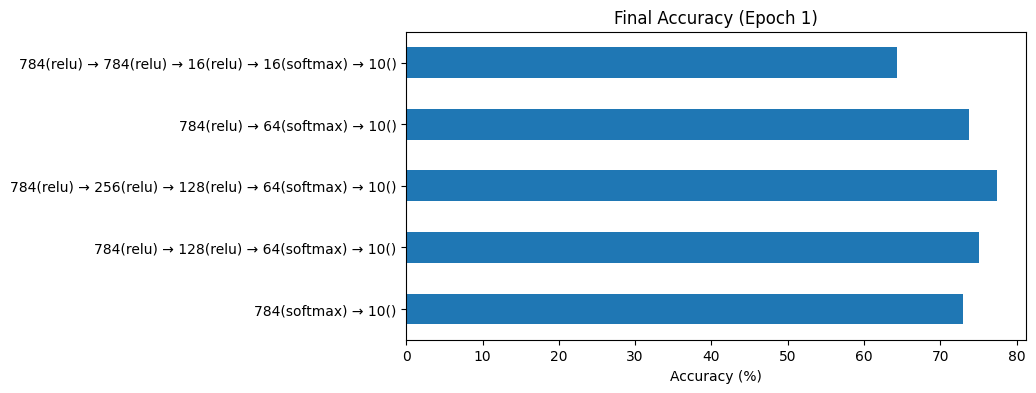

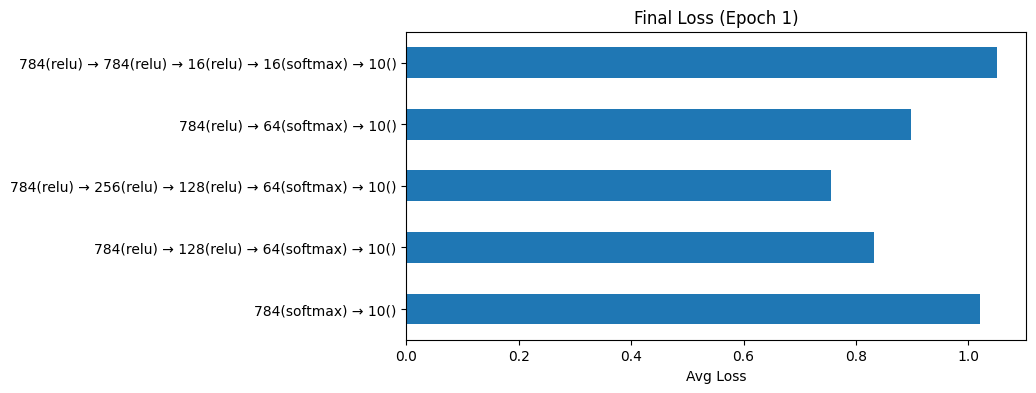

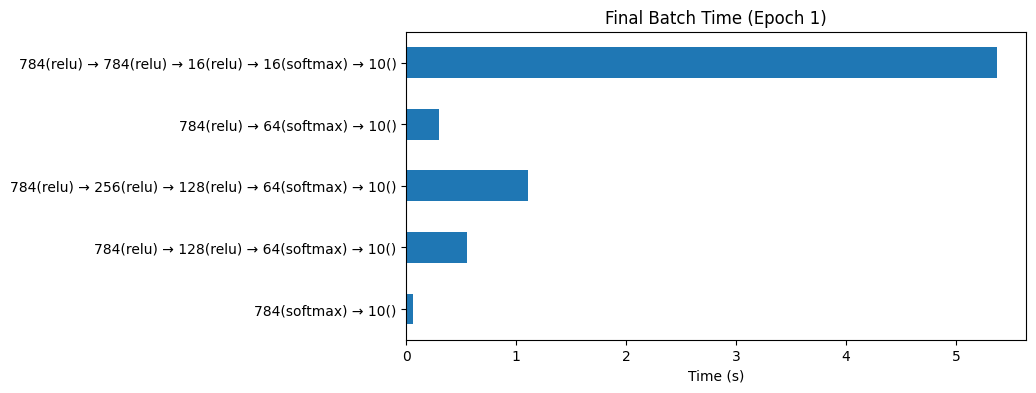

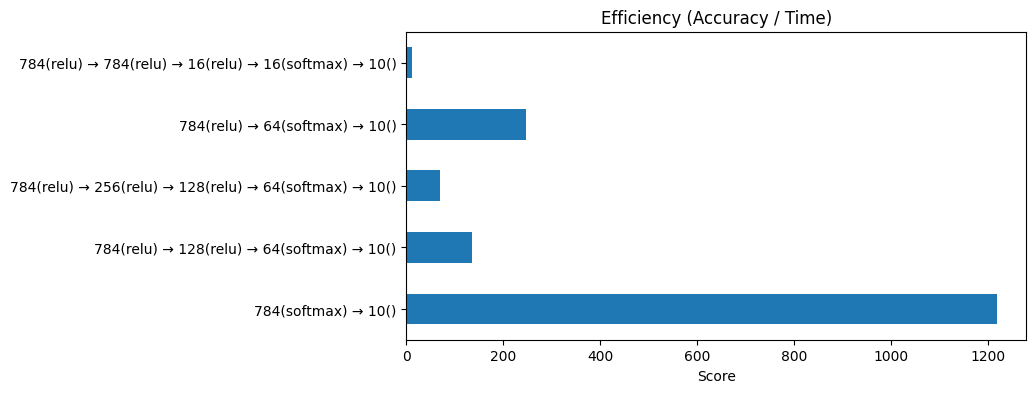

In [19]:

#Accuracy vs Loss
plot_model_comparison(accuracy_lines, "Processed Images", "Accuracy (%)", "Accuracy vs Processed Images")

#Loss vs Processed
plot_model_comparison(loss_lines, "Processed Images", "Avg Loss", "Loss vs Processed Images")

#Batch Time vs Processed
plot_model_comparison(batch_time_lines, "Processed Images", "Batch Time (s)", "Batch Time vs Processed Images")

#Bar charts
summary_df['accuracy'].plot(kind='barh', figsize=(8, 4), title="Final Accuracy (Epoch 1)", xlabel="Accuracy (%)")
plt.show()

summary_df['avg_loss'].plot(kind='barh', figsize=(8, 4), title="Final Loss (Epoch 1)", xlabel="Avg Loss")
plt.show()

summary_df['batch_time'].plot(kind='barh', figsize=(8, 4), title="Final Batch Time (Epoch 1)", xlabel="Time (s)")
plt.show()

summary_df['efficiency'].plot(kind='barh', figsize=(8, 4), title="Efficiency (Accuracy / Time)", xlabel="Score")
plt.show()

##### Analyzing change in loss by Epoch

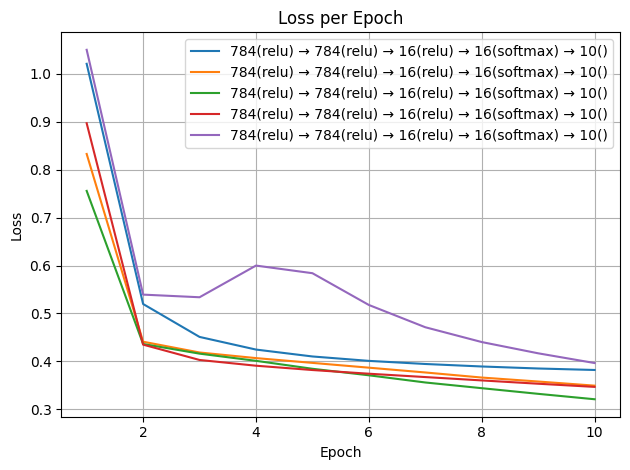

In [20]:
for model, df in epochDataFrames.items():
    plt.plot(df['epoch'], df['loss'], label=model_name)

plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()